In [161]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from statsmodels import stats

## 1.

In [162]:
# Load in the data
df_bears = pd.read_excel('file://localhost/Users/kevin/Dropbox/School/STA-580/final-exam/STA 580 Fall 2015 12-8 Blackboard.xls',
                        header=0, index_col='Case')
df_bears.head()

,X1 Age,X2 Sex,X3 Length,X4 Chest.G,Y Weight,Name
Case,,,,,,
1,19,1,45.0,23,65,Allen
2,19,2,47.5,24,70,Berta
3,20,2,57.0,27,74,Berta
4,23,2,59.5,38,142,Berta
5,29,2,62.0,31,121,Berta


In [163]:
# Fit regression model (6.5) for all four predictor variables
Y = df_bears['Y Weight']
X = df_bears[['X1 Age', 'X2 Sex', 'X3 Length', 'X4 Chest.G']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
res1234 = model.fit()
# Show the model summary
res1234.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y Weight   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     372.7
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           5.57e-50
Time:                        14:39:41   Log-Likelihood:                -390.20
No. Observations:                  83   AIC:                             790.4
Df Residuals:                      78   BIC:                             802.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -199.7560     26.565     -7.519      0.000      -252.644  -146.869
X1 Age         0.6717      0.144      4.670      0.000         0.385     0.958
X2 Sex       -23.1468      7.224     -3.204      0.002       -37.529    -8.764
X3 Length      0.0556      0.668      0.083      0.934        -1.275     1.386
X4 Chest.G    10.7271      0.843     12.726      0.000         9.049    12.405
==============================================================================
Omnibus:                        6.574   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.438
Skew:                           0.388   Prob(JB):                       0.0243
Kurtosis:                       4.245   Cond. No.                         773.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### a. 

The desired regression sums of squares ($SSR(X_4)$, $SSR(X_1 \mid X_4)$, $SSR(X_3 \mid X_4,X_1)$, and $SSR(X_2 \mid X_4,X_1,X_3)$) are in the "Seq SS" column:

    Source         DF   Seq SS  Contribution   Adj SS  Adj MS  F-Value  P-Value
    Regression      4  1125386        95.03%  1125386  281346   372.67    0.000
      X4 Chest.G    1  1107073        93.48%   122257  122257   161.94    0.000
      X1 Age        1    10556         0.89%    16466   16466    21.81    0.000
      X3 Length     1        7         0.00%        5       5     0.01    0.934
      X2 Sex        1     7750         0.65%     7750    7750    10.27    0.002
    Error          78    58885         4.97%    58885     755
    Total          82  1184271       100.00%


### b. 

The alternatives are:

$$H_0: \beta_3 = 0$$
$$H_a: \beta_3 \ne 0$$

If $H_0$ holds, $F^* \sim F(1,n-p) = F(1,83-5) = F(1,78)$. Large values of $F^*$ lead to $H_a$. 

The ANOVA table shows $F^*_3 = 0.01$ with a very large P-value of $0.934$. Since P-value > $\alpha$ ($0.934 > 0.025$), we conclude $H_0$. $X_3$ can be dropped from the regression model. Just to be thorough, let's calculate $F_\text{crit}$:

In [164]:
alpha = 0.025
p = res1234.df_model + 1
n = res1234.nobs
st.f.ppf(1-alpha, 1, n-p)

5.2234831208203953

This confirms what the P-value told us: $F^* < F_\text{crit}$ (0.01 < 5.22), so we conclude $H_0$. 

### c. 

The alternatives are:

$$
\begin{aligned}
H_0&: \beta_2 = \beta_3 = 0 \\
H_a&: \text{not both } \beta_2 \text{ and } \beta_3 \text{ equal } 0 \\
\end{aligned}
$$

If $H_0$ holds, $F^* \sim F(p-q,n-p) = F(5-3,83-5) = F(2,78)$. Large values of $F^*$ lead to $H_a$. 

Using (7.27) and (7.28):

$$F^* = \frac{SSR(X_2 \mid X_1,X_3,X_4)+SSR(X_3 \mid X_1,X_2,X_4)}{p-q} \div \frac{SSE(X_1,X_2,X_3,X_4)}{n-p}$$

Substituting from the ANOVA table above, we have

$$F^* = \frac{7750+5}{5-3} \div \frac{58885}{83-5}$$

In [165]:
q = 3
f_star = (7750+5)/(p-q)/58885/(n-p)
f_star

0.0008442139502681236

Now we calculate $F_\text{crit}$:

In [166]:
st.f.ppf(1-alpha, 2, n-p)

3.8689719121051347

Since $F^* < F_\text{crit}$ (0.0008 < 3.869), we conclude $H_0$: both $X_2$ and $X_3$ can be dropped from the regression model given that $X_1$ and $X_4$ are retained. The P-value of the test is:

In [167]:
st.f.sf(f_star, 2, n-p)

0.99915615142737635

### d.

I'll be using (7.35)-(7.40). I regress $Y$ on $X_1$:

In [168]:
X1 = sm.add_constant(df_bears['X1 Age'])
res1 = sm.OLS(Y, X1).fit()
res1.rsquared

0.59907140211939702

$$R^2_{Y1} = 0.5991$$

Using (7.35):

$$R^2_{Y1 \mid 3} = \frac{SSE(X_3)-SSE(X_1,X_3)}{SSE(X_3)}$$

I'd like to use python `statsmodels` to calculate these values. However, I'm noticing that the packages seems to have SSE and SSR reversed:

#### Minitab

    Regression Analysis: Y Weight versus X1 Age 

    Source         DF   Seq SS  Contribution  Adj SS  Adj MS  F-Value  P-Value
    Regression      1   709463        59.91%  709463  709463   121.03    0.000
    Error          81   474808        40.09%  474808    5862

#### `statsmodels`

In [169]:
res1.ess

709462.92454797903

In [170]:
res1.ssr

474808.13569298468

So I'll just need to keep this in mind. First I need a two more regressions:

In [171]:
# Regress Y on X3
X3 = sm.add_constant(df_bears['X3 Length'])
res3 = sm.OLS(Y, X3).fit()
# SSE for Y ~ X3
res3.ssr

283970.29174884409

In [172]:
# Regress Y on X1, X3
X13 = sm.add_constant(df_bears[['X1 Age', 'X3 Length']])
res13 = sm.OLS(Y,X13).fit()
# SSE for Y ~ X1 + X3
res13.ssr

217094.94291882598

In [173]:
Rsq_1_3 = (res3.ssr - res13.ssr)/res3.ssr
Rsq_1_3

0.2355012153495466

$$R^2_{Y1|3} = 0.2355$$

Using (7.35) with (7.3a), I have:

$$R^2_{Y1 \mid 34} = \frac{SSE(X_3,X_4)-SSE(X_1,X_3,X_4)}{SSE(X_3,X_4)}$$

I'll need another regression:

In [174]:
# Regress Y on X3, X4
X34 = sm.add_constant(df_bears[['X3 Length', 'X4 Chest.G']])
res34 = sm.OLS(Y, X34).fit()
# SSE for Y ~ X3 + X4
res34.ssr

77007.354993202418

In [175]:
Rsq_1_34 = (res34.ssr - res1234.ssr)/res34.ssr
Rsq_1_34

0.23532989711154029

$$R^2_{Y1 \mid 34} = 0.2353$$

The degree of marginal linear association between $Y$ and $X_1$ dropped significantly when adjusted for $X_3$, from 60% to 24%. However, adding $X_4$ did not change the difference since $R^2_{Y1|3}$ and $R^2_{Y1 \mid 34}$ are both 24%. 

## 2.

### a.

    Best Subsets Regression: Y Weight versus X1 Age, X2 Sex, ... 

    Response is Y Weight

                                                                    X
                                                                  X 4
                                                                  3
                                                                    C
                                                              X X L h
                                                              1 2 e e
                                                                  n s
                                                              A S g t
                 R-Sq               R-Sq                      g e t .
    Vars  R-Sq  (adj)      PRESS  (pred)  Mallows Cp       S  e x h G
       1  93.5   93.4    82504.6    93.0        23.3  30.872        X
       1  76.0   75.7   301210.5    74.6       297.2  59.210      X
       1  59.9   59.4   506897.8    57.2       549.9  76.563  X
       1   5.1    4.0  1171113.8     1.1      1408.9  117.76    X
       2  94.4   94.2    74491.7    93.7        11.3  28.862  X     X
       2  93.6   93.5    82281.0    93.1        23.1  30.738    X   X
       2  93.5   93.3    84701.3    92.8        25.0  31.026      X X
       2  81.7   81.2   235500.7    80.1       210.6  52.093  X   X
       3  95.0   94.8    66359.6    94.4         3.0  27.303  X X   X
       3  94.4   94.2    76532.7    93.5        13.3  29.043  X   X X
       3  93.6   93.4    84517.3    92.9        24.8  30.884    X X X
       3  84.7   84.1   202255.7    82.9       164.9  47.885  X X X
       4  95.0   94.8    68308.4    94.2         5.0  27.476  X X X X
       
First I plot $R^2_{ap}$:

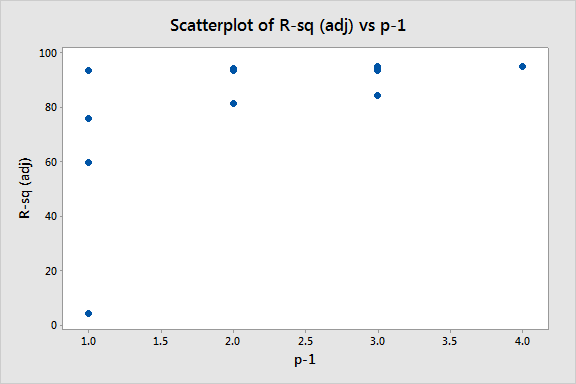

In [176]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/final-exam/Scatterplot of R-sq (adj) vs p-1.png')

And then scaled so you can actually see which model is best:

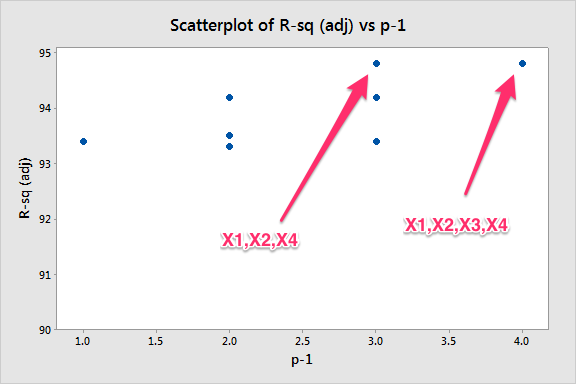

In [177]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/final-exam/Scatterplot_of_R-sq__adj__vs_p-1_-scaled.png')

Next I plot $C_p$:

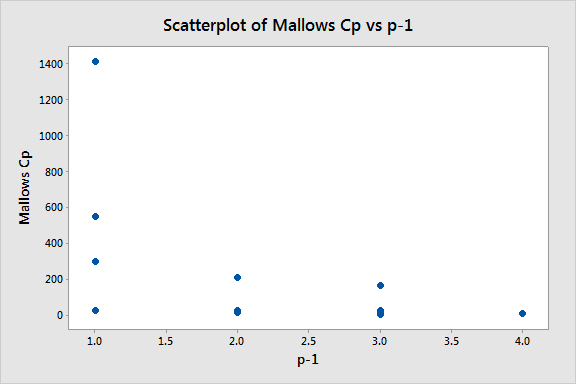

In [178]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/final-exam/Scatterplot of Mallows Cp vs p-1.png')

And then we zoom in:

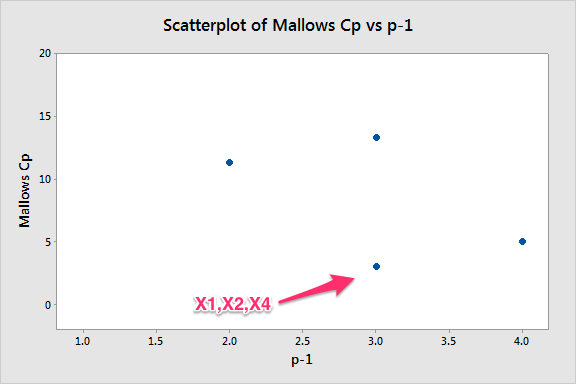

In [179]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/final-exam/Scatterplot_of_Mallows_Cp_vs_p-1_-scaled.png')

Next I plot $PRESS_p$:

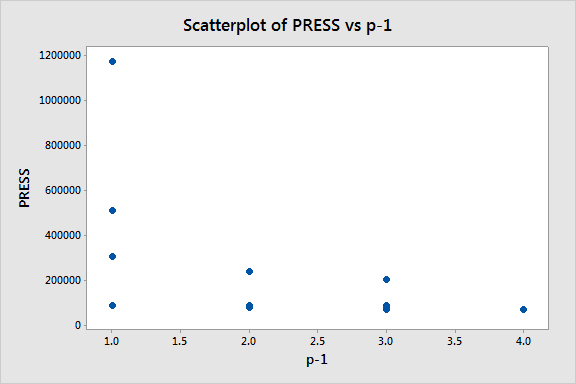

In [180]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/final-exam/Scatterplot of PRESS vs p-1.png')

And scaled:

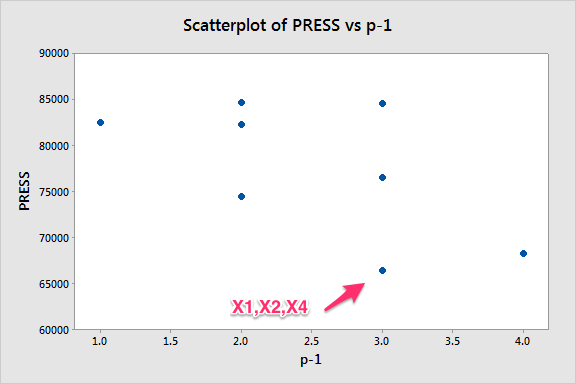

In [181]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/final-exam/Scatterplot_of_PRESS_vs_p-1_-scaled.png')

Finally, I need $AIC_p$. Since Minitab doesn't provide it, I'm going to collect it for only the models identified as best by the above measures, which would be $(X_1, X_2, X_4)$ and $(X_1, X_2, X_3, X_4)$. Since I'll only be comparing two values, this will not require a graph. 

In [182]:
# First, the full model
res1234.aic

790.39769753892597

In [183]:
# Regress Y on X1, X2, X4
X124 = sm.add_constant(df_bears[['X1 Age', 'X2 Sex', 'X4 Chest.G']])
res124 = sm.OLS(Y,X124).fit()
# Find AIC
res124.aic

788.40506946031473

As you can see, $AIC_p$ is slightly lower for $(X_1, X_2, X_4)$. So, the best subsets according to each measure are:

1. $R^2_{ap}$: tie between $(X_1, X_2, X_4)$ and $(X_1, X_2, X_3, X_4)$
2. $AIC_p$: $(X_1, X_2, X_4)$
3. $C_p$: $(X_1, X_2, X_4)$
4. $PRESS_p$: $(X_1, X_2, X_4)$


### b. 

Yes, all four criteria identify the same best subset, $(X_1, X_2, X_4)$. No, this does not always happen.


### c. 

This was done already and the Minitab output is provided above. 


### d. 

    Stepwise Selection of Terms

    Candidate terms: X4 Chest.G, X1 Age, X3 Length, X2 Sex

                 -----Step 1----    -----Step 2----    -----Step 3----
                   Coef        P      Coef        P      Coef        P
    Constant     -274.7             -247.4             -198.4
    X4 Chest.G   12.880    0.000    11.520    0.000    10.781    0.000
    X1 Age                           0.491    0.001     0.673    0.000
    X2 Sex                                             -23.15    0.002

    S                    30.8718            28.8623            27.3029
    R-sq                  93.48%             94.37%             95.03%
    R-sq(adj)             93.40%             94.23%             94.84%
    R-sq(pred)            93.03%             93.71%             94.40%
    Mallows’ Cp            23.26              11.28               3.01

    α to enter = 0.05, α to remove = 0.1
    
According to forward stepwise regression, the best subset of predictor variables is $(X_1, X_2, X_4)$.


### e. 

The best model according to $R^2_{ap}$ was a tie between $(X_1, X_2, X_4)$ and $(X_1, X_2, X_3, X_4)$. So yes, this agrees with forward stepwise regression, which identified $(X_1, X_2, X_4)$ as the best model.

## 3.

### a.

I am using $(X_1, X_2, X_4)$ as my model.

In [184]:
inf = res124.get_influence()
# Deleted studentized residuals are the last column of this DataFrame
df_influence = inf.summary_frame()
# Show the first five studentized deleted residuals
df_influence.student_resid.head()

Case
1    0.974814
2    1.642500
3    0.529438
4   -1.484862
5    0.446980
Name: student_resid, dtype: float64

Find the Bonferonni critical value, $t(1-\alpha/2n;n-p-1)$:

In [185]:
alpha_bon = 0.10
bonf = st.t.cdf(1-alpha_bon/(2*n),n-p-1)
bonf

0.83963375233290471

If the absolute value of a studentized deleted residual is greater than 0.8396, we conclude the case is an outlier. Let's find them:

In [206]:
# Let's find all the observations for which the studentized deleted 
# residual is greater than the Bonferroni critical value
outliers_bonf = []
for row in df_influence.itertuples():
    if np.abs(row.student_resid) > bonf:
        outliers_bonf.append(row.Index)  
# Print the case numbers of cases with outlying studentized deleted residuals
# on two lines since it was getting cut off
print(outliers_bonf[:16])
print(outliers_bonf[16:])

[1, 2, 4, 8, 12, 13, 14, 16, 17, 18, 25, 26, 29, 31, 33, 37]
[41, 44, 46, 51, 53, 58, 64, 68, 70, 72, 73, 75, 76, 90, 132, 139, 140]


### b.

A case is considered to have an outlying X value if the hat matrix diagonal value is greater than $p/n$. Let's find them:

In [187]:
# Now let's find all the observations for which the 
# hat matrix diagonal is greater than p/n
h_bar = p/n
outliers_hat = []
for row in df_influence.itertuples():
    if row.hat_diag > h_bar:
        outliers_hat.append(row.Index) 
# Print the case numbers of cases with outlying X values
print(outliers_hat)

[4, 10, 12, 13, 14, 15, 16, 17, 26, 33, 37, 41, 42, 58, 59, 73, 132]


### c. 

I am going to do the matrix algebra in python again, following along with http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html. I'll be using $X_1=186$, $X_2=1$, $X_4=51$ and (10.29).

In [188]:
from scipy import linalg
# First term is the constant
X_new = np.array([[1], [186], [1], [51]]) # vector of prediction values
X_new

array([[  1],
       [186],
       [  1],
       [ 51]])

In [189]:
X_new.T  # transpose of X_new

array([[  1, 186,   1,  51]])

In [190]:
h_new_new = X_new.T.dot(linalg.inv(X124.T.dot(X124))).dot(X_new)  # (10.29), p. 400
h_new_new = h_new_new[0][0]  # extract value from 1x1 array
h_new_new

0.33929319662467133

Let's get the range of leverage values:

In [191]:
(df_influence.hat_diag.min(), df_influence.hat_diag.max())

(0.018177674076655402, 0.32713833750456045)

Since $h_{\text{new,new}}$ is outside the range of leverage values, this set of predictor values _does_ represent a hidden extrapolation. Upon inspection of the data, this is easy to see. 51 is toward the high end of the range of Girth values and an age of 186 months (15.5 years) is outside the range of observed age data. Those ranges are:

In [192]:
# Girth observational value range
(df_bears['X4 Chest.G'].min(), df_bears['X4 Chest.G'].max())

(19.0, 55.0)

In [193]:
# Age observational value range
(df_bears['X1 Age'].min(), df_bears['X1 Age'].max())

(8, 177)

### d. 

After sorting the studentized deleted residuals and inspecting them, I see the three cases with the largest absolute value are cases 132, 76 and 33. Let's collect the influence data for just these three cases:

In [194]:
outliers = [33,76,132]
# I'm sure there's a way to find these indices directly, but I don't have time to find it
outlier_indices = [29,72,79]  
df_influence_outliers = df_influence.iloc[outlier_indices]
# Show DFBETAS, Cook's Distance and DFFITS
df_influence_outliers

,dfb_const,dfb_X1 Age,dfb_X2 Sex,dfb_X4 Chest.G,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
Case,,,,,,,,,,
33,0.177313,0.022159,0.267857,-0.286331,0.096898,0.640178,0.622568,0.069867,2.271558,2.335814
76,0.246000,0.352346,-0.010090,-0.414254,0.067433,-0.536335,-0.519357,0.044353,-2.410753,-2.489563
132,-0.509233,-0.180492,-0.046370,0.697212,0.235381,1.060552,0.970321,0.064541,3.694124,4.037644


#### DFFITS

Kutner et al. suggest (p. 401) that we consider a case influential if $DFFIT > 2\sqrt{\frac{p}{n}}$ for large data sets. I don't know if 83 observations is a large data set but I'm going to assume it is. Let's calculate that critical value:

In [195]:
dffit_crit = 2*np.sqrt(p/n)
dffit_crit

0.49088069367381598

All three cases have $\left|DFFIT\right| > 0.491$, with case 132 having the largest $DFFIT$. 

#### Cook's Distance

Let's check the Cook's distance values against the corresponding F-distribution.

In [196]:
# First, we need the corresponding F distribution
f_bears = st.f(p, n-p)  # f_cp will be F(5, 78)
# Now, let's compare each Cook's Distance value against 
# the F percentile point function
for row in df_influence_outliers.itertuples():
    percentile = f_bears.ppf(row.cooks_d)  # find the percentile
    print((row.Index, percentile))

(33, 0.31411885320450444)
(76, 0.26178542862406146)
(132, 0.51437657391877234)


Kutner et al. advise paying special attention to observations for which the percentile value is near 50 percent or more. By this standard, we need to pay special attention to case 132. 


#### DFBETAS

Kutner et al. recommends comparing the absolute value of DFBETA values against  $\frac{2}{\sqrt n}$. Let's find this critical value:

In [197]:
dfb_crit = 2/np.sqrt(n)
dfb_crit

0.21952851997938069

Comparing the DFBETAS against this critical value, it appears that cases 132 and possibly 76 have undue influence on the regression coefficients. 


### e. 

I already have the fitted values from the regression including all cases. I need to fit another regression without the influential cases and then add back in a fitted value for the X values for the missing case. I will take my method of calculating average absolute percent difference from the ch. 10 homework and turn it into a function so that I can easily use it for each case:

In [198]:
# Note: this only works for this data set. It would need to be modified 
# heavily to work for general cases
def aapd(case):
    # Fit the regression without case case
    Y_reduced = df_bears.drop(case)['Y Weight']  # drop the 6th case
    X_reduced = X124.drop(case)
    # fit an ord. least squares regression to reduced data set
    res_reduced = sm.OLS(Y_reduced, X_reduced).fit()
    # convert fits to a data type I can modify
    fits_reduced = res_reduced.fittedvalues.to_dict()
    # calculate the fit for the case we removed and store it with the rest of the fits
    par = res_reduced.params
    fits_reduced[case] = par['const'] + df_bears['X1 Age'][case]*par['X1 Age'] \
        + df_bears['X2 Sex'][case]*par['X2 Sex'] \
        + df_bears['X4 Chest.G'][case]*par['X4 Chest.G']
    # convert original fits to dictionary data type also
    fits = res124.fittedvalues.to_dict()
    # Calculate the average absolute percent difference
    sum = 0
    for x in df_bears.index:  # bear case numbers don't follow clean sequence
        sum += np.abs((fits_reduced[x] - fits[x])/fits[x])
    aapd_val = sum*100/n
    return aapd_val

Now I can simply call this function for each of the three cases under consideration:

In [199]:
for case in outliers:
    print((case, aapd(case)))

(33, 2.3075180992672144)
(76, 0.86495041942375039)
(132, 2.1590429381467922)


The average absolute percent difference shows the effect of an individual case on inferences made with the regression function calculated with and without that case. We see that none of the influential cases have more than a 2.5% average effect on the fitted values. 


### f. 

I am assuming I am to plot Cook's distance for _all_ cases, not just the three influential cases under consideration. 

/Users/kevin/envs/stats3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


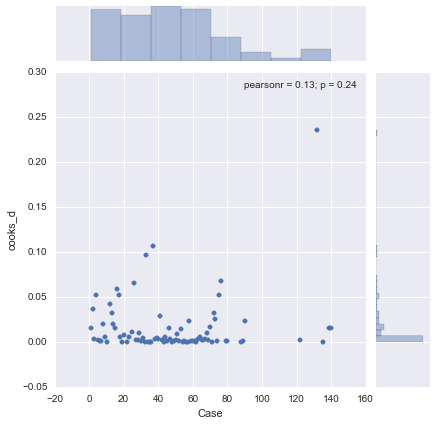

In [200]:
sns.jointplot(x=df_influence.index, y=df_influence.cooks_d)

Yes, case 132 ($D_i=0.235$) is influential by this measure.

### g. 

/Users/kevin/envs/stats3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


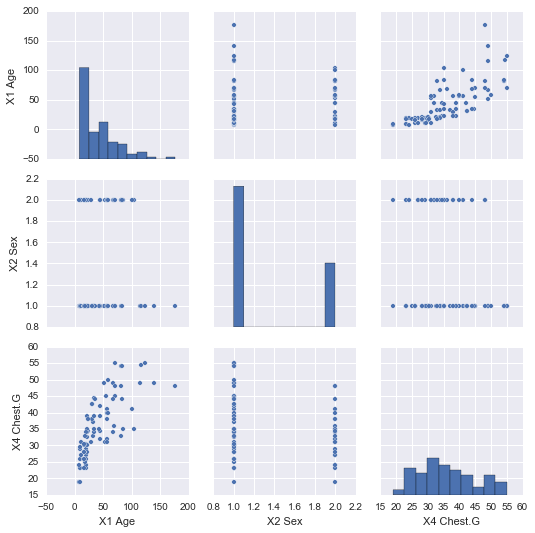

In [201]:
sns.pairplot(df_bears[['X1 Age', 'X2 Sex', 'X4 Chest.G']])

    Correlation: X1 Age, X2 Sex, X4 Chest.G 

                    X1 Age      X2 Sex
    X2 Sex           0.119
                     0.285

    X4 Chest.G       0.734      -0.197
                     0.000       0.074


    Cell Contents: Pearson correlation
                   P-Value

I have a hard time visually seeing pairwise linear correlations between $X_2$ (sex) and the other variables. The correlation matrix shows that there is a statistically significant correlation between $X_1$ and $X_2$ (P-value = 0.285), though the the correlation coefficient $r$ is only 0.119. Visually, it appears that there is a strong linear correlation between $X_1$ and $X_4$. $r$ is 0.734, but the P-value is 0+, so perhaps it is not as significant as it looks. 


### h. 

First, we need $R^2_k$ for $X_1, X_2, X_4$:

In [202]:
# Set up the "X" matrices
X24 = sm.add_constant(df_bears[['X2 Sex', 'X4 Chest.G']])
X14 = sm.add_constant(df_bears[['X1 Age', 'X4 Chest.G']])
X12 = sm.add_constant(df_bears[['X1 Age', 'X2 Sex']])
# Perform the regression fits
res_k1 = sm.OLS(df_bears['X1 Age'], X24).fit()
res_k2 = sm.OLS(df_bears['X2 Sex'], X14).fit()
res_k4 = sm.OLS(df_bears['X4 Chest.G'], X12).fit()
# Find each of the R-squared values
r_sq = {
    1: res_k1.rsquared, 
    2: res_k2.rsquared, 
    4: res_k4.rsquared
    }
r_sq

{1: 0.61147415512159564, 2: 0.18984321513238167, 4: 0.62125176242913049}

Now, using (10.41), we calculate VIF values:

In [203]:
for i, r in r_sq.items():
    print(('X{i}'.format(i=i), 1/(1-r)))  # calculate VIF values

('X1', 2.5738313504291246)
('X2', 1.2343289825850221)
('X4', 2.640276312342932)


Since Kutner et al. indicate that $VIF$ values greater than 10 indicate that multicollinearity may be unduly influencing least squares estimates and all of the $VIF$ values for this model are less than 3, I do not think multicollinearity is a concern. Yes, these results are more revealing than my results in part (g), which were less certain.